<a href="https://colab.research.google.com/github/alimay01/MACH22-23/blob/main/food_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **<center>🍔FOOD VISION🍔</center>**
---
### <center>Machine Learning 22/23</center>
###### <center> Integrantes: Álvaro Belmar, Javier Capilla, Alicia Mayorga</center>

# **0. Introducción**

La <u>**clasificación de imágenes**</u> es una tarea fundamental en los campos de la visión artificial y el aprendizaje automático. En este ámbito, uno de los datasets más conocidos es **food101** creado por Lukas Bossard, Matthieu Guillaumin y Luc Van Gool de la Escuela Politécnica Federal de Lausana en Suiza. Este contiene un gran conjunto de imágenes de alimentos de 101 categorías diferentes, con un total de 100.000 imágenes.

> El <u>**objetivo del trabajo**</u> de clasificación basado en dicho conjunto de datos es desarrollar un modelo de aprendizaje automático que pueda *reconocer correctamente las imágenes de alimentos y clasificarlas en sus respectivas categorías*. Para ello se ha entrenado un modelo que pueda aprender patrones y rasgos característicos en las imágenes y usar este conocimiento para hacer predicciones precisas. 

Para llevar a cabo esta tarea se utilizan técnicas de aprendizaje automático como las <u>redes neuronales convolucionales</u>, que se ha demostrado su gran eficacia para la clasificación de imágenes. 

La clasificación de alimentos es todo un reto debido a la diversidad y complejidad de las imágenes y la similitud visual entre algunas categorías. Nuestro objetivo final será crear un modelo preciso que pueda tener un uso práctico en áreas como la nutrición y la industria alimentaria.

# **0.1 Contenidos**

Para el objetivo del trabajo se usará **TensorFlow**, una biblioteca de aprendizaje automático de código abierto creada por [Google Brain](https://research.google/teams/brain/) para Machine Learning a gran escala. Es una plataforma capaz de procesar datos, construir y entrenar modelos de ML.

Los pasos a seguir en este proyecto serán los siguientes:

- Cargar y preparar el 10% del dataset food101 que serán los datos de entrenamiento.
- Entrenar un modelo de extracción de características que nos permitirá reducir la dimensionalidad, capturar mejor la información importante y mejorar el rendimiento del modelo.
- Evaluar el modelo.

Una de las ventajas de TensorFlow es que nos permite utilizar la GPU para acelerar los procesos sobretodo cuando se trabaja con redes neuronales profundas y con grandes conjuntos de datos.

Nos podemos asegurar de estar usando la GPU con el siguiente código, si no, deberemos cambiar nuestro tipo de entorno de ejecución a GPU:

In [ ]:
!nvidia-smi

Mon Jun  5 16:34:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **0.2 Importación de librerías y funciones auxiliares**

Nos montamos el drive en el notebook para acceder a nuestros archivos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/foodvision')      # foodvision carpeta con los recursos

Importamos tanto tensorflow como alguna funciones auxiliares definidas en el archivo ```helper_function.py```.



In [ ]:
import tensorflow as tf
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

import pprint   # ajustar salidas al espacio

In [ ]:
from IPython.core.display import display, HTML

# Código para centrar los plots en el notebook
display(HTML("<style>.output_result { text-align: center; }</style>"))

# **1. Food101 Dataset**

Vamos a bajarnos un conjunto de datos que contiene el 10% del dataset food101.

In [ ]:
# Download data from Google Storage (already preformatted)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 

unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2023-06-05 16:38:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 142.250.97.128, 74.125.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   163MB/s    in 13s     

2023-06-05 16:38:35 (120 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



Preprocesamos y reescalamos las imágenes tanto en los datos de train como de test.

In [ ]:
IMG_SIZE = (224, 224)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)
                                                                                
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False) 

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


Mostramos todas las categorías que encontramos en el dataset.

In [ ]:
labels = train_data_all_10_percent.class_names
pprint.pprint(labels, compact=True)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare',
 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito',
 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake',
 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla',
 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros',
 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame',
 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict',
 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras',
 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari',
 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad',
 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger',
 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream',
 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese',
 'macaron

Analicemos qué forma tiene un dato de nuestro conjunto.  En este caso, el dataset ya ha sido tratado y todas las imágenes tienen ya la forma de un <u>tensor</u>.

In [ ]:
train_one = train_data_all_10_percent.take(1)

In [ ]:
# Información del elemento
for image, label in train_one:
  print(f"""
  Image shape: {image.shape}      # Es un tensor de dimensión 3. Ej.(32, 512, 512, 3)
  Image dtype: {image.dtype}      # clase del elemento
        """)
image                             # Podemos ver que forma tiene un tensor


  Image shape: (32, 224, 224, 3)      # Es un tensor de dimensión 3. Ej.(32, 512, 512, 3)
  Image dtype: <dtype: 'float32'>      # clase del elemento
        


<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
array([[[[  2.       ,   3.       ,   7.       ],
         [  3.9285717,   4.9285717,   9.928572 ],
         [  6.214286 ,   7.       ,  12.642858 ],
         ...,
         [ 12.280685 ,  13.709213 ,  19.137741 ],
         [ 15.668372 ,  16.668371 ,  21.668371 ],
         [ 15.770386 ,  16.770386 ,  21.770386 ]],

        [[  1.6683673,   2.6683671,   6.6683674],
         [  3.9285717,   4.9285717,   8.928572 ],
         [  6.015306 ,   6.80102  ,  12.443878 ],
         ...,
         [ 13.28578  ,  14.714308 ,  20.142836 ],
         [ 16.       ,  17.       ,  22.       ],
         [ 15.642822 ,  16.642822 ,  21.642822 ]],

        [[  1.       ,   2.       ,   4.       ],
         [  2.9285717,   3.9285717,   7.9285717],
         [  5.214286 ,   6.       ,  11.642858 ],
         ...,
         [ 14.357208 ,  15.785736 ,  21.214264 ],
         [ 16.       ,  17.       ,  22.       ],
         [ 15.5050745,  16.290789 ,  21.93364

## **2. Ajuste del modelo**




Creamos un checkpoint para guardar el modelo y poder llamarlo más adelante.

In [ ]:
# Create checkpoint callback to save model for later use
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,       # save only the model weights
                                                         monitor="val_accuracy",       # save the model weights which score the best validation accuracy
                                                         save_best_only=True)          # only keep the best model weights on file (delete the rest)
     

Utilizaremos la API Sequential para un aumento de datos.

> El aumento de datos o **data augmentation** es una técnica que nos permite ampliar nuestro set de datos de entrenamiento para mejorar la precisión, la generalización, y controlar el overfitting.

In [ ]:
# Import the required modules for model creation
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

Ya estamos listos para empezar a ajustar nuestro modelo. Se hará uso del proceso de **feature extraction**.

>La **extracción de características** de tensores utiliza modelos previamente entrenados o capas convolucionales de tensores para extraer características de interés de los datos.
* Las tareas de clasificación de imágenes usan modelos previamente entrenados para obtener representaciones significativas de imágenes de entrada usando capas convolucionales. Estas representaciones se pueden utilizar posteriormente en otros modelos para realizar tareas como la clasificación, el reconocimiento de objetos y la segmentación. 
* La ventaja es que el aprendizaje por transferencia se puede usar para lograr buenos resultados con menos recursos computacionales y de datos porque se usa el conocimiento previo aprendido por modelos pre-entrenados.

In [ ]:
# Montar el modelo base y fijar las capas para la "extraccion de caracteristicas"
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False

# Montar el modelo que permita capas para entrenar
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")                                                          # forma de una imagen
x = data_augmentation(inputs)                                                                                           # aumento de datos
x = base_model(x, training=False)                                                                                       # modelo base
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)                                                     # realizamos un pooling
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)        # output tiene la misma longitud que las clases
model = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 0s 0us/step


Si queremos obtener un resumen de nuestro modelo:

In [ ]:
# summary de nuestro modelo
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

Nuestro modelo cuenta principalmente con 5 capas.

Algo muy importante son los valores de *Trainable params* y de *Non-trainable params*. Es justo lo que buscábamos; que en esta primera extracción de características todos los patrones aprendidos esten en el modelo base fijos. 

In [ ]:
# Compilado
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=["accuracy"])

# Ajuste
history_all_classes_10_percent = model.fit(train_data_all_10_percent,
                                           epochs=5,                                          # 5 epochs
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)),       # no se evalua en todo el conjunto de test_data
                                           callbacks=[checkpoint_callback])                   # save best model weights to file

Epoch 1/5
237/237 [==============================] - 120s 434ms/step - loss: 3.3550 - accuracy: 0.2809 - val_loss: 2.5406 - val_accuracy: 0.4298
Epoch 2/5
237/237 [==============================] - 88s 370ms/step - loss: 2.2046 - accuracy: 0.4932 - val_loss: 2.0969 - val_accuracy: 0.4960
Epoch 3/5
237/237 [==============================] - 69s 287ms/step - loss: 1.8103 - accuracy: 0.5695 - val_loss: 1.9322 - val_accuracy: 0.5124
Epoch 4/5
237/237 [==============================] - 65s 268ms/step - loss: 1.5973 - accuracy: 0.6133 - val_loss: 1.8148 - val_accuracy: 0.5336
Epoch 5/5
237/237 [==============================] - 69s 291ms/step - loss: 1.4433 - accuracy: 0.6446 - val_loss: 1.7976 - val_accuracy: 0.5252


In [ ]:
# Evaluacion del modelo
results_feature_extraction_model = model.evaluate(test_data)
results_feature_extraction_model

790/790 [==============================] - 65s 82ms/step - loss: 1.5942 - accuracy: 0.5781


[1.5941821336746216, 0.5780990123748779]

Veamos representados los accuracy y los val_loss.

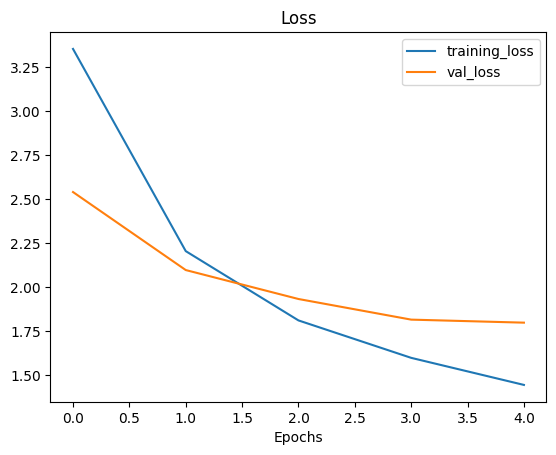

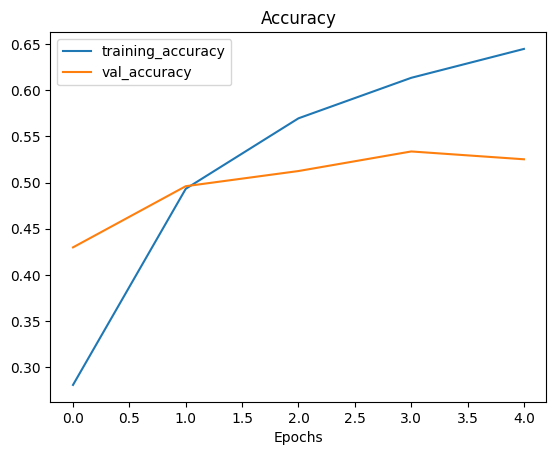

In [ ]:
plot_loss_curves(history_all_classes_10_percent)

# **3. Fine tuning**

Nuestro modelos anterior, un modelo de transferencia de aprendizaje con extracción de características, se ha ajustado bastantes bien. Ahora nuestro siguiente paso será buscar herramientas o nuevos procesos que mejoren dicho modelo.


> El ajuste fino o **fine tuning**, es una técnica de aprendizaje automático que adapta un modelo previamente entrenado para una tarea general a una tarea más específica. 
* En lugar de entrenar un modelo desde cero, los pesos y parámetros de un modelo previamente entrenado se ajustan para adaptarse a nuevos datos para una tarea específica. Esto se logra mediante la descongelación de algunas capas del modelo y usando un nuevo conjunto de datos para entrenamiento adicional. 
* El ajuste fino le permite aprovechar el conocimiento previo aprendido de modelos previamente entrenados para mejorar el rendimiento en nuevas tareas con menos datos de entrenamiento. 

In [ ]:
# 'Descongelar' las capas que teníamos fijadas en el modelo base
base_model.trainable = True

# Volver a fijar todas las capas excepto las ultimas 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

A la hora de realizar un ajuste fino, es común disminuir la tasa de aprendizaje para asegurar la correcta actualización de los pesos. Esto se incluye en la recompilación que se debe hacer siempre cuando se está aplicando un fine tuning.

In [ ]:
# Recompilacion del modelo
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # 10x mas lento
              metrics=['accuracy'])

Podemos comprobar que tanto la descongelación como la fijación de las últimas 5 capas se ha realizado correctamente.

In [ ]:
# Capas que pueden entrenarse (fijas)
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_average_pooling True
output_layer True


In [ ]:
# Todas las capas
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

Probemos con 5 epochs y veamos si obtenemos una mejora significativa.

In [ ]:
fine_tune_epochs = 10 # por los 5 de antes y los 5 nuevos

history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),                     # validate on 15% of the test data
                                                     initial_epoch=history_all_classes_10_percent.epoch[-1])          # start from previous last epoch

Epoch 5/10
237/237 [==============================] - 70s 249ms/step - loss: 1.2042 - accuracy: 0.6875 - val_loss: 1.7219 - val_accuracy: 0.5448
Epoch 6/10
237/237 [==============================] - 63s 265ms/step - loss: 1.0949 - accuracy: 0.7119 - val_loss: 1.7547 - val_accuracy: 0.5323
Epoch 7/10
237/237 [==============================] - 51s 211ms/step - loss: 1.0027 - accuracy: 0.7358 - val_loss: 1.7111 - val_accuracy: 0.5530
Epoch 8/10
237/237 [==============================] - 50s 210ms/step - loss: 0.9447 - accuracy: 0.7481 - val_loss: 1.7164 - val_accuracy: 0.5519
Epoch 9/10
237/237 [==============================] - 61s 257ms/step - loss: 0.8857 - accuracy: 0.7642 - val_loss: 1.7626 - val_accuracy: 0.5448
Epoch 10/10
237/237 [==============================] - 50s 207ms/step - loss: 0.8250 - accuracy: 0.7836 - val_loss: 1.7448 - val_accuracy: 0.5495


Recordemos que el ajuste del modelo lo evalua en una pequeña muestra del conjunto de test. Por tanto, debemos evaluar el modelo sobre todo el conjunto.

In [ ]:
# Evaluacion en todo el conjunto test
results_all_classes_10_percent_fine_tune = model.evaluate(test_data)
results_all_classes_10_percent_fine_tune

790/790 [==============================] - 75s 94ms/step - loss: 1.5197 - accuracy: 0.5964


[1.5197139978408813, 0.5963564515113831]

Vemos que ha sido una mejora bastante ligera. Veamos de nuevo los gráficos para comparar.

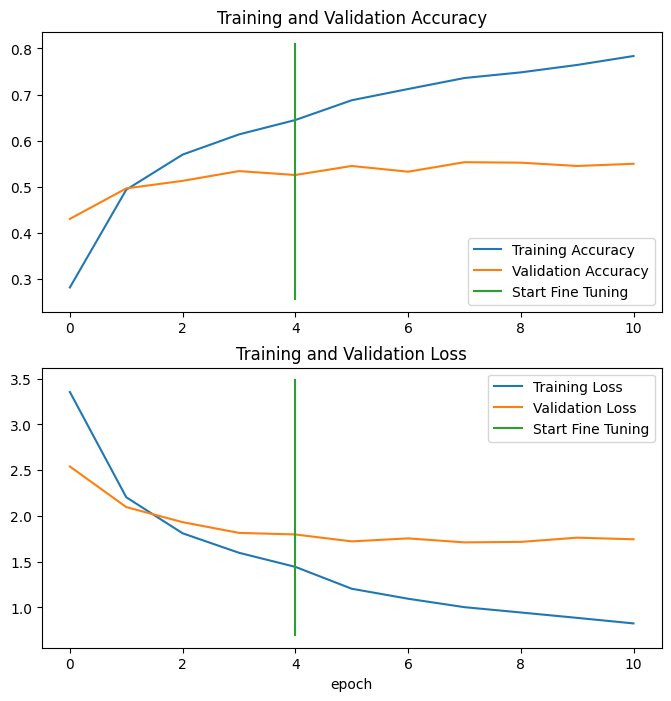

In [ ]:
compare_historys(original_history=history_all_classes_10_percent,
                 new_history=history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

# **4. Evaluación del modelo**




In [ ]:
# Veamos que efectivamente estamos usando el modelo con fine tuning
loaded_loss, loaded_accuracy = model.evaluate(test_data)
loaded_loss, loaded_accuracy

790/790 [==============================] - 71s 89ms/step - loss: 1.5197 - accuracy: 0.5964


(1.5197139978408813, 0.5963564515113831)

## **4.1 Obtención de las predicciones**

Veamos como nuestro modelo realiza predicciones para todo nuestro conjunto de test, la forma de estas, las probabilidades que se obtienen, etc. Utilizando ```predict()```:

In [ ]:
# Realizar predicciones
pred_probs = model.predict(test_data, verbose=1) 

790/790 [==============================] - 74s 91ms/step


Lo que se obtiene es un **tensor de probabilidades de predicción** con la siguiente forma:

In [ ]:
pred_probs[:10] # 10 primeras predicciones

array([[2.41077498e-01, 2.70065793e-04, 1.81679979e-01, ...,
        1.44410715e-05, 4.30042855e-03, 1.46291181e-02],
       [9.20473158e-01, 3.30669288e-08, 3.87164211e-04, ...,
        3.52385454e-03, 1.58102921e-07, 7.37499658e-06],
       [6.12010062e-01, 5.07506775e-03, 1.04987100e-02, ...,
        3.50123883e-04, 3.58404592e-04, 2.91861058e-03],
       ...,
       [3.65075469e-01, 2.51886422e-06, 1.33843056e-03, ...,
        6.90318197e-02, 7.05980754e-04, 5.14102459e-04],
       [2.16770172e-01, 6.06664573e-04, 2.81358689e-01, ...,
        2.45807343e-04, 3.16213089e-04, 1.99337330e-04],
       [7.74228513e-01, 6.02660350e-07, 8.17588356e-04, ...,
        3.71255400e-03, 1.01473358e-06, 1.42583274e-03]], dtype=float32)

Para un elemento más concreto podemos obtener la siguiente información:

In [ ]:
print(f"Numero de probabilidades de prediccion para la muestra 0: {len(pred_probs[0])}")                          # Deberia ser 101 (todas las clases)
print("-" * 60)
print(f"El tensor de probabilidades de prediccion:\n {pred_probs[0]}")
print("-" * 60)
print(f"La clase con mayor probabilidad de predicción para la muestra 0: {pred_probs[0].argmax()}")               # Veamos cual va a ser la prediccion final

Numero de probabilidades de prediccion para la muestra 0: 101
------------------------------------------------------------
El tensor de probabilidades de prediccion:
 [2.41077498e-01 2.70065793e-04 1.81679979e-01 2.54609859e-07
 1.57544364e-05 2.63812876e-06 5.47303571e-05 9.93669164e-06
 6.45890087e-02 5.52812591e-04 1.15621867e-06 4.54445717e-06
 3.19251209e-04 8.22899267e-07 7.81320129e-03 2.54589831e-03
 2.60078887e-05 1.73152855e-03 4.17381385e-03 1.11392055e-05
 8.91427568e-04 5.35252502e-06 3.32494412e-04 1.41274664e-04
 2.02863128e-03 1.42540643e-03 7.97522778e-04 1.86512814e-04
 8.47757682e-02 8.31131707e-04 3.73513967e-06 6.24399807e-04
 9.38482757e-04 2.81369807e-07 5.10632480e-03 1.91111067e-05
 1.66451762e-04 2.09178985e-03 2.02047955e-02 6.15574099e-05
 4.08536551e-04 2.55963649e-03 5.76701132e-04 1.38917376e-05
 1.78746384e-04 2.26024258e-05 5.08979941e-03 4.34638991e-04
 2.15525279e-06 1.15739718e-01 6.96366420e-04 2.40163699e-05
 5.57644963e-02 3.54987532e-02 3.3186206

Siguiendo esta idea busquemos el máximo de todas las predicciones de todos las observaciones.

In [ ]:
# Prediccion de cada imagen
pred_classes = pred_probs.argmax(axis=1)

# Encabezado
pred_classes[:10]

array([ 0,  0,  0,  8,  8, 78, 29,  0,  2,  0])

El siguiente paso será comparar estas predicciones con las originales y evaluar.

Para ello primero debemos obtener las etiquetas originales del conjunto test, que recordemos lo tenemos por lotes (batches), con lo que habrá que deshacerlo. Al no haber realizado un shuffle sobre los datos de test anteriormente las etiquetas ya vienen ordenadas.

In [ ]:
y_labels = []
for images, labels in test_data.unbatch():          # deshacemos los lotes del conjunto test y tomamos las imagenes y las etiquetas.
  y_labels.append(labels.numpy().argmax())          
len(y_labels)                                       # comprobacion del tamaño, debe ser 25250

25250

## **4.2 Evaluación de las predicciones**

Una manera muy sencilla de evaluar nuestras predicciones es usar la función accuracy_score() de Scikit-Learn. Esta función compara las etiquetas verdaderas con las predichas y devuelve una tasa de acierto (accuracy score). 

Si hemos creado nuestras y_labels y pred_classes correctamente, deberíamps tener unos valores de accuracy similares a los obtenidos con el método evaluate() que hemos usado antes.

In [ ]:
# Obtenemos las accuracy score comparando las clases predichas con las verdaderas
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.5963564356435643

In [ ]:
# ¿Tenemos resultados similares con el evaluate y el accuracy de Scikit-Learn?
import numpy as np
print(f"Resultados similares? {np.isclose(loaded_accuracy, sklearn_accuracy)} | Diferencia: {loaded_accuracy - sklearn_accuracy}")

Resultados similares? True | Diferencia: 1.5867818725645577e-08


Parece que nuestras pred_classes e y_labels están bien.

In [ ]:
# Vamos ahora a hacer una matriz de confusión. Usaremos la función auxiliar make_confusion_matrix

from helper_functions import make_confusion_matrix

De momento nuestras predicciones y etiquetas verdaderas están en la forma de integers, sin embargo, serán mucho más fáciles de entender si ponemos sus nombres. Podemos hacer esto usando el atributo class_names de nuestro test_data.

In [ ]:
# obtenemos los nombres de las clases
class_names = test_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
# Dibujamos una matriz de confusión con todas la 25250 predicciones, etiquetas verdaderas y 101 clases

make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

La matriz de confusión muestra que la mayoría de las predicciones son correctas. Además nos muestra en qué clases "se confunde" nuestro modelo. En general, se equivoca prediciendo clases que visualmente son muy parecidas como filet_mignon con pork_chop and chocolate_cake con tiramisu.

Evaluamos también las predicciones de nuestro modelo usando la función de Scikit-Learn classification_report(). Esta función devuelve la precision, recall y la puntuación f-1 por clase

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.29      0.22      0.25       250
           1       0.45      0.75      0.56       250
           2       0.69      0.60      0.64       250
           3       0.90      0.45      0.60       250
           4       0.53      0.44      0.48       250
           5       0.42      0.44      0.43       250
           6       0.77      0.78      0.78       250
           7       0.76      0.77      0.76       250
           8       0.21      0.64      0.31       250
           9       0.45      0.64      0.53       250
          10       0.56      0.38      0.45       250
          11       0.87      0.52      0.65       250
          12       0.67      0.62      0.64       250
          13       0.60      0.50      0.55       250
          14       0.64      0.51      0.57       250
          15       0.40      0.35      0.37       250
          16       0.70      0.51      0.59       250
          17       0.26    

Con tantas clases las métricas anteriores son un poco difíciles de entender. Vamos a hacer esto más fácil.

Primero, obtendremos el output del classification_report() como un diccionario fijando output_dict=True

In [ ]:
# Obtenemos un diccionario del classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.29473684210526313,
  'recall': 0.224,
  'f1-score': 0.2545454545454545,
  'support': 250},
 '1': {'precision': 0.4519230769230769,
  'recall': 0.752,
  'f1-score': 0.5645645645645646,
  'support': 250},
 '2': {'precision': 0.6944444444444444,
  'recall': 0.6,
  'f1-score': 0.6437768240343348,
  'support': 250},
 '3': {'precision': 0.904,
  'recall': 0.452,
  'f1-score': 0.6026666666666667,
  'support': 250},
 '4': {'precision': 0.5317073170731708,
  'recall': 0.436,
  'f1-score': 0.47912087912087914,
  'support': 250},
 '5': {'precision': 0.41825095057034223,
  'recall': 0.44,
  'f1-score': 0.42884990253411315,
  'support': 250},
 '6': {'precision': 0.7686274509803922,
  'recall': 0.784,
  'f1-score': 0.7762376237623763,
  'support': 250},
 '7': {'precision': 0.7619047619047619,
  'recall': 0.768,
  'f1-score': 0.7649402390438246,
  'support': 250},
 '8': {'precision': 0.20893561103810776,
  'recall': 0.636,
  'f1-score': 0.314540059347181,
  'support': 250},
 '9'

Vamos a aprovechar que el f1-score combina la precision y el recall en una métrica. Para extraerla, creamos un diccionario vacío al que llamaremos class_f1_scores y luego, iteramos sobre cada elemento en el classification_report_dict, anexando el nombre de la clase y el f1-score.

In [ ]:
# Creamos un diccionario vacío
class_f1_scores = {}
# Iteramos sobre cada elemento del classification report
for k, v in classification_report_dict.items():
  if k == "accuracy": # paramos una vez alcancemos la tasa de acierto 
    break
  else:
    # Anexamos los nombres de las clases y las f1-scores al nuevo diccionario
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.2545454545454545,
 'baby_back_ribs': 0.5645645645645646,
 'baklava': 0.6437768240343348,
 'beef_carpaccio': 0.6026666666666667,
 'beef_tartare': 0.47912087912087914,
 'beet_salad': 0.42884990253411315,
 'beignets': 0.7762376237623763,
 'bibimbap': 0.7649402390438246,
 'bread_pudding': 0.314540059347181,
 'breakfast_burrito': 0.5298013245033113,
 'bruschetta': 0.45346062052505964,
 'caesar_salad': 0.6466165413533834,
 'cannoli': 0.6446280991735537,
 'caprese_salad': 0.5478260869565217,
 'carrot_cake': 0.5657015590200445,
 'ceviche': 0.37288135593220334,
 'cheese_plate': 0.5893271461716937,
 'cheesecake': 0.3577863577863578,
 'chicken_curry': 0.49056603773584906,
 'chicken_quesadilla': 0.6639511201629329,
 'chicken_wings': 0.7265135699373694,
 'chocolate_cake': 0.5551181102362204,
 'chocolate_mousse': 0.375249500998004,
 'churros': 0.746450304259635,
 'clam_chowder': 0.7037861915367484,
 'club_sandwich': 0.6898047722342733,
 'crab_cakes': 0.3775280898876405,
 'creme_brule

Parece que nuestro diccionario está ordenado por los nombres de las clases. Sin embargo, si intentamos visualizar diferentes puntuaciones, podría lucir mejor si estuviera ordenado por las puntuaciones. 

Convertimos nuestro diccionario class_f1_scores en un dataframe y lo ordenamos en orden ascendente

In [ ]:
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

class_name  f1-score
33    edamame  0.966469
63   macarons  0.906383
69    oysters  0.853755
75        pho  0.852071
51  guacamole  0.841897

Hacemos ahora un gráfico de barras

NameError: ignored

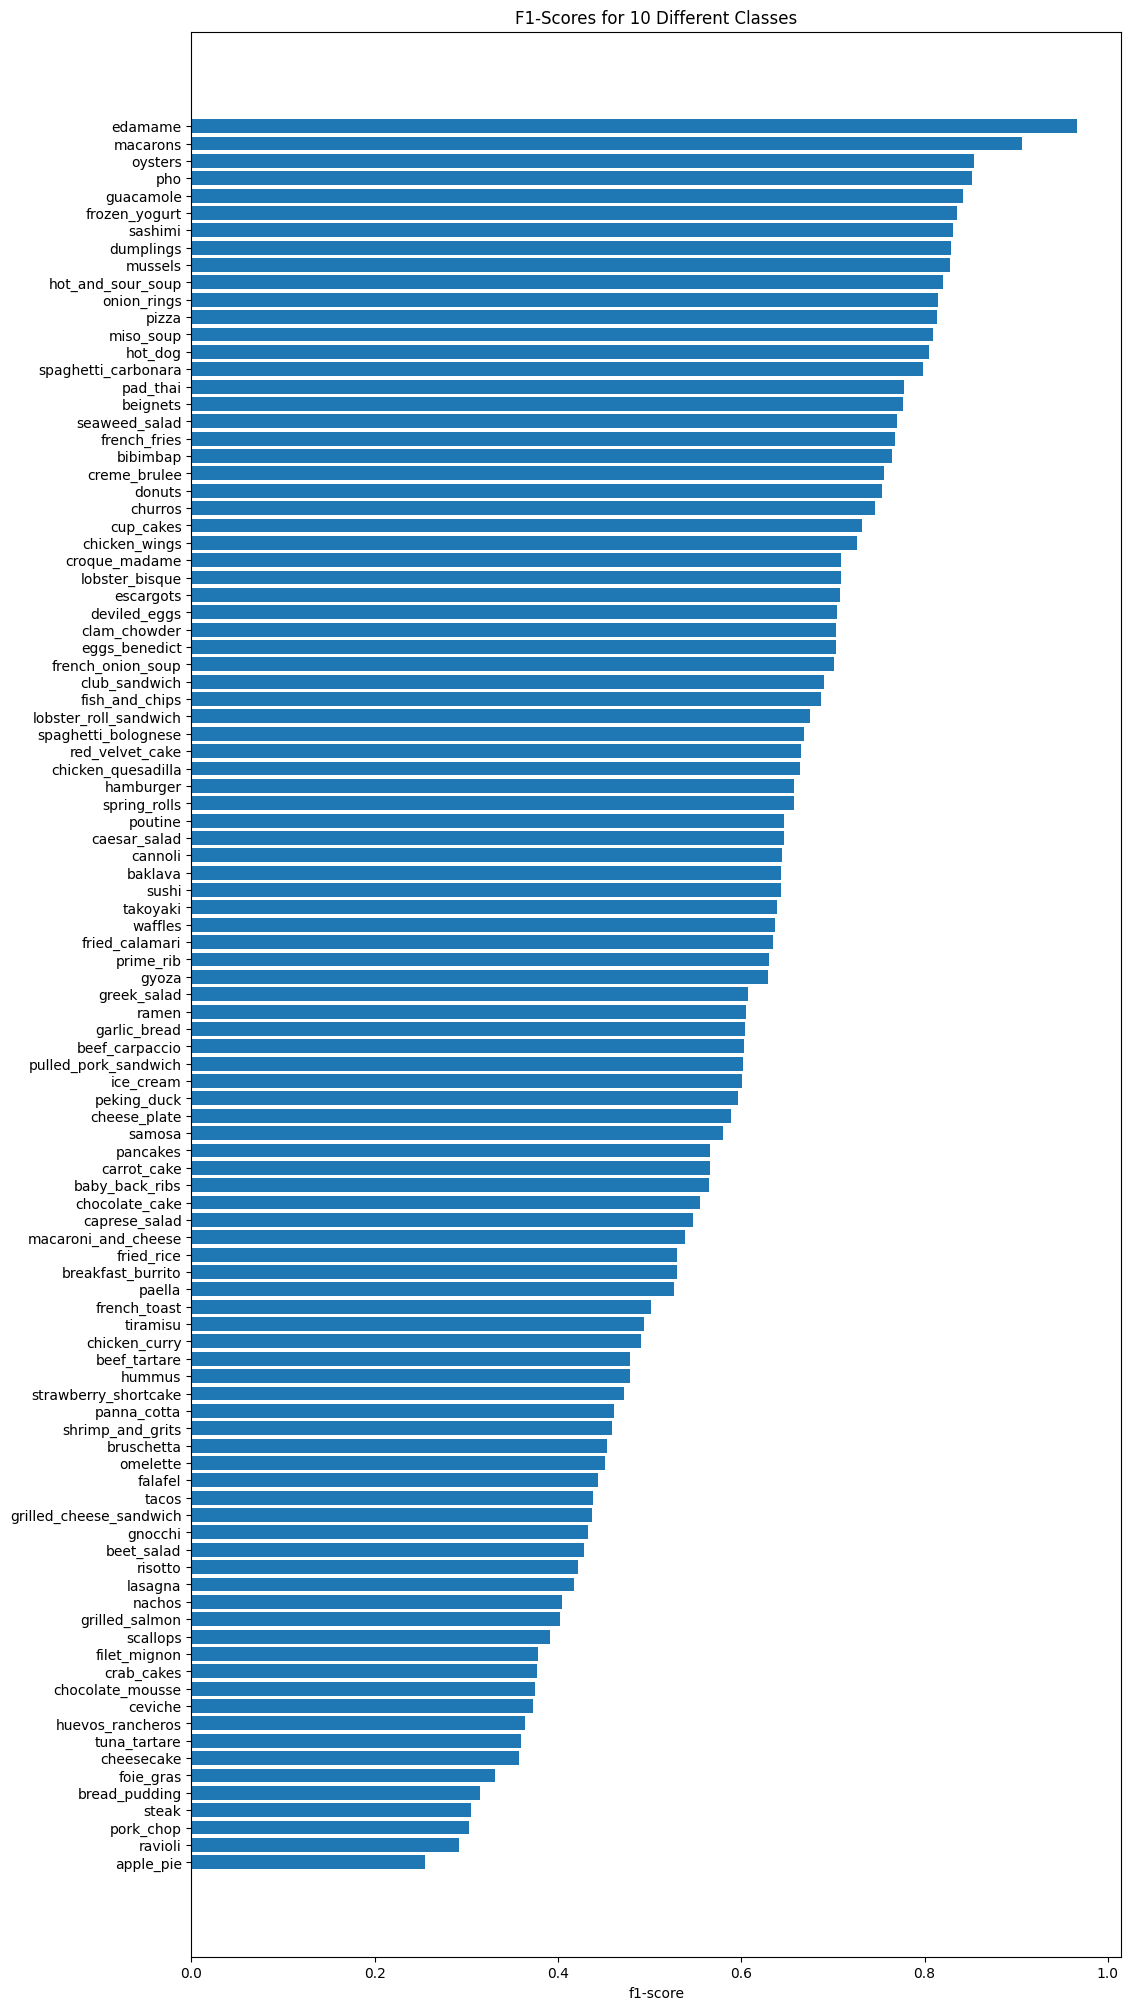

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); 

from helper_functions import autolabel
autolabel(scores)

Ahora, además de las tasas de acierto, vemos claramento cómo de bien nuestro modelo predice clase por clase. 
Parece que lo hace regular en clases como apple_pie y ravioli, pero lo hace muy bien en clases como edamame y pho.
Esto nos da pistas de cómo podríamos proceder más adelante. Quizás se podrían obtener más datos de las clases en las que peores resultados se tienen. 

## **4.3 Visualización de predicciones**

Hagamos ahora una prueba esencial. Vamos a visualizar las predicciones en imágenes reales. Aun después de la evaluación extensa de la sección anterior, sin visualización es difícil entender cuál es la calidad del modelo. 

Por cómo está construido nuestro modelo, previo a clasificar una imagen tenemos que cargarla en un tensor. 

Por tanto, necesitamos construir primero una función que cargue la imagen en un tensor. 

Específicamente, la función hará:

* Leer en un filepath usando tf.io.read_file().
* Convertir la imagen en un Tensor usando tf.io.decode_image().
* Ajustar la imagen para que tenga el mismo tamaño que las imágenes con las que el modelo ha sido entrenado (224 x 224) usando tf.image.resize().
* Escalar la imagen para conseguir que los valores de los píxeles estén entre 0 y 1 si es necesario. 

In [ ]:
from helper_functions import load_and_prep_image


Esta función estará en el documento auxiliar. 

Las funciones de carga de imágenes y preprocesamiento están preparadas.

El próximo código nos permitirá: 

* Introducir algunas imágenes del dataset de test. 
* Hacer predicciones sobre ellas.
* Plotear la imagen original junto a la etiqueta predicha por el modelo, la probabilidad de la predicción y la etiqueta original. 

1/1 [==============================] - 0s 31ms/step


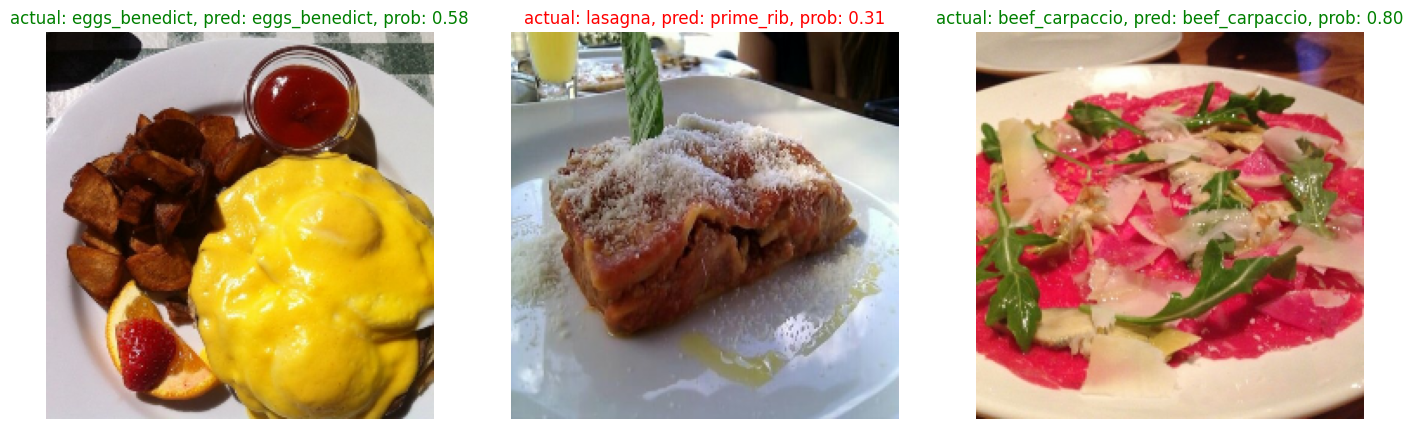

In [ ]:
# Hacer predicciones en imágenes aleatorias 
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Escoger una imagen aleatoria de una clase aleatoria 
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Cargar la imagen y hacer predicciones 
  img = load_and_prep_image(filepath, scale=False) # no escalar imágenes para predicciones EfficientNet 
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # El modelo acepta tensores del tipo [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # encontrar la clase predicha

  # Plotear la imagen
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Poner color verde si la predicción es correcta, y rojo en caso contrario 
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

Después de hacer unos cuantos ejemplos, nos queda claro que el modelo tiende a hacer malas predicciones en clases que visualmente son muy similares, como "baby_back_ribs" y "steak" y viceversa.

### **Encontrando las predicciones más erróneas**
Es buena idea hacer al menos 100 predicciones con imágenes para entender cómo está funcionando el modelo. 

Las predicciones más erróneas son aquellas en las cuales el modelo está muy seguro de su decisión pero yerra. Esto nos dará información sobre cómo está fallando el modelo. 

Vamos a escribir código para captar este tipo de errores. Por ejemplo, incluiremos la predicción en esta categoría si la probabilidad de predicción es mayor o igual que 0.95 pero la predicción es incorrecta. 

Seguiremos estos pasos:

1. Obtener las rutas de las imágenes en el dataset de test usando el método list_files().
2. Crear un DataFrame de pandas de las rutas de las imágenes, etiquetas verdaderas, clases predichas, predicción de probabilidad máxima, nombres de clases y nombres de clases predichas. 
**Nota**: El DataFrame no es necesario pero ayudará a visualizar las cosas.
3. Usar el DataFrame para encontrar las predicciones erróneas. 
4. Ordenar el DF de las predicciones erróneas poniendo primero las que tienen la mayor probabilidad de predicción. 
5. Visualizar las imágenes las imágenes con la mayor probabilidad de predicción cuya predicción es errónea.

In [ ]:
# 1. Obtener los nombres de los archivos en nuestro dataset de test 
filepaths = []
for filepath in test_data.list_files("101_food_classes_10_percent/test/*/*.jpg", 
                                     shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]


[b'101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [ ]:
# 2. Crear un DataFrame con la información de predicciones para analizarla 
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1), # extraer la probabilidad máxima de predicción
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]}) 
pred_df.head()

img_path  y_true  y_pred  \
0  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
1  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
2  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
3  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   
4  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   

   pred_conf y_true_classname y_pred_classname  
0   0.241077        apple_pie        apple_pie  
1   0.920473        apple_pie        apple_pie  
2   0.612010        apple_pie        apple_pie  
3   0.369335        apple_pie    bread_pudding  
4   0.786473        apple_pie    bread_pudding

In [ ]:
# 3. ¿Es la predicción correcta?
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

img_path  y_true  y_pred  \
0  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
1  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
2  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
3  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   
4  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   

   pred_conf y_true_classname y_pred_classname  pred_correct  
0   0.241077        apple_pie        apple_pie          True  
1   0.920473        apple_pie        apple_pie          True  
2   0.612010        apple_pie        apple_pie          True  
3   0.369335        apple_pie    bread_pudding         False  
4   0.786473        apple_pie    bread_pudding         False

In [ ]:
# 4. Obtener los 100 ejemplos más erróneos 
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong.head(20)

img_path  y_true  y_pred  \
7194   b'101_food_classes_10_percent/test/croque_mada...      28       7   
14630  b'101_food_classes_10_percent/test/ice_cream/3...      58      78   
9326   b'101_food_classes_10_percent/test/filet_migno...      37      79   
11642  b'101_food_classes_10_percent/test/garlic_brea...      46      10   
16271  b'101_food_classes_10_percent/test/mussels/140...      65      69   
21810  b'101_food_classes_10_percent/test/scallops/17...      87      29   
23631  b'101_food_classes_10_percent/test/strawberry_...      94      83   
18001  b'101_food_classes_10_percent/test/pancakes/10...      72      67   
4583   b'101_food_classes_10_percent/test/chicken_cur...      18      60   
24479  b'101_food_classes_10_percent/test/takoyaki/68...      97      78   
11146  b'101_food_classes_10_percent/test/fried_rice/...      44      62   
17855  b'101_food_classes_10_percent/test/paella/2314...      71      65   
733    b'101_food_classes_10_percent/test/baklava/763...       2      12   
10847  b'101_food_classes_10_percent/test/fried_calam...      43      68   
19430  b'101_food_classes_10_percent/test/pork_chop/3...      77       1   
10289  b'101_food_classes_10_percent/test/french_onio...      41      62   
5114   b'101_food_classes_10_percent/test/chicken_win...      20      38   
22511  b'101_food_classes_10_percent/test/spaghetti_b...      90      78   
10741  b'101_food_classes_10_percent/test/french_toas...      42       1   
6108   b'101_food_classes_10_percent/test/clam_chowde...      24      27   

       pred_conf      y_true_classname     y_pred_classname  pred_correct  
7194    0.998294         croque_madame             bibimbap         False  
14630   0.996571             ice_cream              poutine         False  
9326    0.996077          filet_mignon            prime_rib         False  
11642   0.995655          garlic_bread           bruschetta         False  
16271   0.995598               mussels              oysters         False  
21810   0.995156              scallops            cup_cakes         False  
23631   0.994946  strawberry_shortcake      red_velvet_cake         False  
18001   0.994360              pancakes             omelette         False  
4583    0.993678         chicken_curry       lobster_bisque         False  
24479   0.993482              takoyaki              poutine         False  
11146   0.993198            fried_rice  macaroni_and_cheese         False  
17855   0.993172                paella              mussels         False  
733     0.993119               baklava              cannoli         False  
10847   0.992878        fried_calamari          onion_rings         False  
19430   0.992408             pork_chop       baby_back_ribs         False  
10289   0.992080     french_onion_soup  macaroni_and_cheese         False  
5114    0.991859         chicken_wings       fish_and_chips         False  
22511   0.991367   spaghetti_bolognese              poutine         False  
10741   0.990891          french_toast       baby_back_ribs         False  
6108    0.990681          clam_chowder         creme_brulee         False

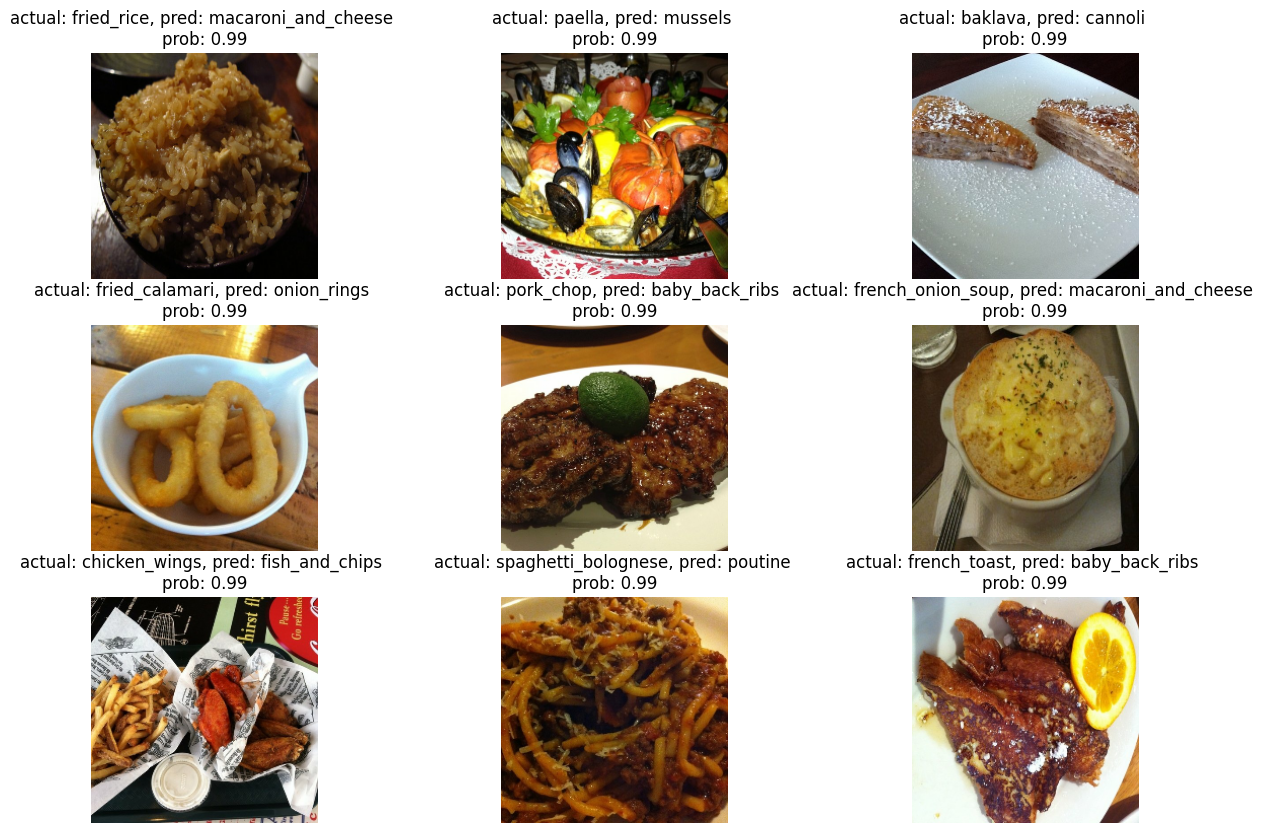

In [ ]:
# 5. Visualizar alguno de estos ejemplos 
images_to_view = 9
start_index = 10 # cambiar el índice de comienzo para ver más 
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()): 
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # solo nos interesan ciertos parámetros de cada fila 
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)

Estudiando las predicciones más erróneas del modelo nos podría permitir observar un par de cosas: 

* **Algunas etiquetas podrían estar mal** - si el modelo es suficientemente bueno, podría estar prediciendo correctamente imágenes cuya etiqueta esté mal asignada. Esto es, el modelo entiende la realidad pero la etiqueta está mal. Podríamos usar el modelo para corregir las etiquetas mal asignadas. Esto se llama "active learning".

* **¿Podemos obtener más instancias?** - si hay una tendencia de clasificar erróneamente una clase específica, podría ser buena idea obtener más instancias de la clase en cuestión (que es menos costoso que obtener más instancias de todas las clases).

### **Testeamos el modelo con imágenes customizadas**
De momento, las imágenes usadas solo provenían del dataset de test. Es hora del examen definitivo: usar el modelo para predecir imágenes customizadas de comida. 

Para esto, tendremos que subir nuestras imágenes a Colab, o ponerlas en una carpeta para cargarlas al notebook.

En nuestro caso, hemos preparado unas pocas imágenes de varias comidas. 

Las descargamos y descomprimimos. 

In [ ]:
# Descargamos las imágenes de Google Storage
# Nota: podríamos haber usado cualquier otra imagen de comida
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip

unzip_data("custom_food_images.zip") 

--2023-06-05 17:07:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip’

custom_food_images. 100%[===================>]  12.58M  --.-KB/s    in 0.1s    

2023-06-05 17:07:13 (88.6 MB/s) - ‘custom_food_images.zip’ saved [13192985/13192985]



In [ ]:
# Obtenemos las rutas de los archivos
custom_food_images = ["custom_food_images/" + img_path for img_path in os.listdir("custom_food_images")]
custom_food_images

['custom_food_images/sushi.jpeg',
 'custom_food_images/chicken_wings.jpeg',
 'custom_food_images/pizza-dad.jpeg',
 'custom_food_images/ramen.jpeg',
 'custom_food_images/steak.jpeg',
 'custom_food_images/hamburger.jpeg']

Ahora podemos usar un código similar al usado previamente para cargar nuestras imágenes, hacer predicciones con el modelo entrenado y plotear la imagen junto a su clase predicha. 

1/1 [==============================] - 0s 28ms/step


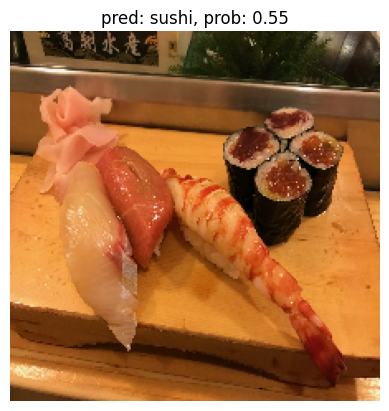

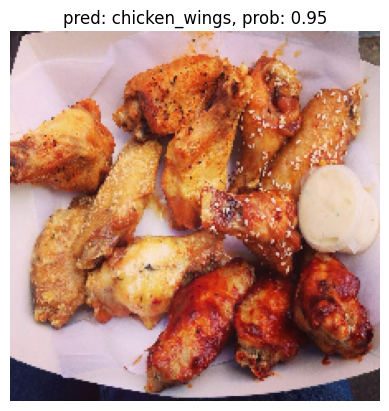

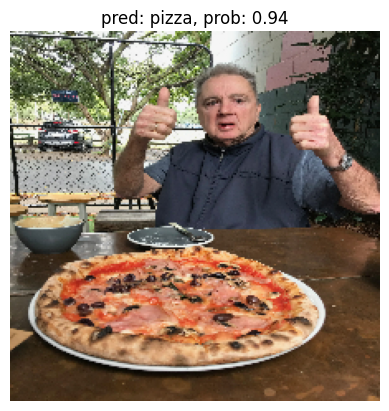

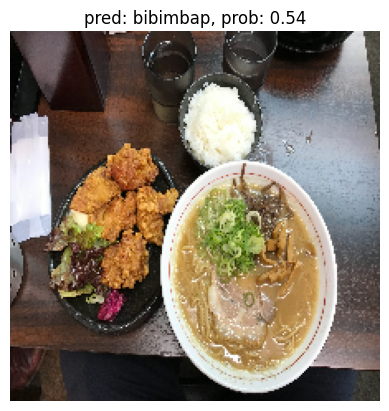

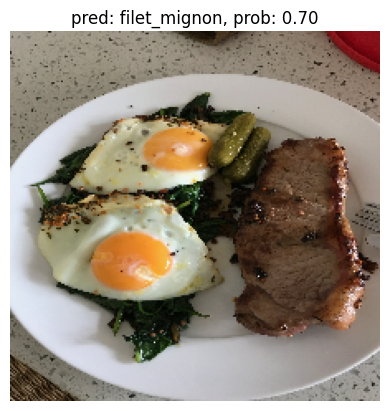

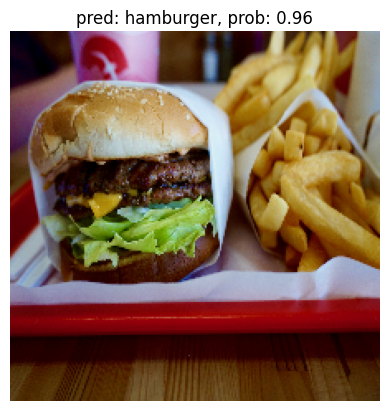

In [ ]:
# Hacemos predicciones de las imágenes customizadas
for img in custom_food_images:
  img = load_and_prep_image(img, scale=False) # cargamos la imagen y la convertimos en un tensor 
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # hacemos la predicción de la imagen con forma [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # encontrar la etiqueta de la clase predicha 
  # Plotear la imagen con las anotaciones apropiadas the image with appropriate annotations
  plt.figure()
  plt.imshow(img/255.) # imshow() requiere un input tipo float 
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)

Después de realizar esta última prueba, podemos dar por concluido el trabajo final de la asignatura. 



# **5. Conclusión**
En este trabajo, hemos construido una red neuronal de clasificación de imágenes de comida. En concreto, hemos usado el 10% de las imágenenes de una base de 100.000 imágenes y 101 categorías llamada Food101.

Las métricas agregadas de precisión obtenidas son: 0.63 de precisión, 0.60 de recall y 0.61 de f1-score. Los resultados son bastante positivos teniendo en cuenta la complejidad del problema y que solo hemos usado 100 imágenes por categoría (solo el 10% de la base). 

Si usamos el total del dataset obtendríamos mejores resultados. Otra opción más eficiente sería incrementar el número de instancias de las clases que se han conseguido clasificar peor. 


